In [26]:
import pandas as pd

In [27]:
pollution = pd.read_csv("../data/GCB2022v27_MtCO2_flat.csv")
print(pollution)

           Country ISO 3166-1 alpha-3  Year         Total          Coal  \
0      Afghanistan                AFG  1750      0.000000           NaN   
1      Afghanistan                AFG  1751      0.000000           NaN   
2      Afghanistan                AFG  1752      0.000000           NaN   
3      Afghanistan                AFG  1753      0.000000           NaN   
4      Afghanistan                AFG  1754      0.000000           NaN   
...            ...                ...   ...           ...           ...   
63099       Global                WLD  2017  36096.739276  14506.973805   
63100       Global                WLD  2018  36826.506600  14746.830688   
63101       Global                WLD  2019  37082.558969  14725.978025   
63102       Global                WLD  2020  35264.085734  14174.564010   
63103       Global                WLD  2021  37123.850352  14979.598083   

                Oil          Gas       Cement     Flaring       Other  \
0               NaN       

In [28]:
pollution = pollution[pollution["Year"] >= 1900]
print(pollution)
pollution.to_csv("../data/CO2_Emissions.csv", index = False)

           Country ISO 3166-1 alpha-3  Year         Total          Coal  \
150    Afghanistan                AFG  1900      0.000000           NaN   
151    Afghanistan                AFG  1901      0.000000           NaN   
152    Afghanistan                AFG  1902      0.000000           NaN   
153    Afghanistan                AFG  1903      0.000000           NaN   
154    Afghanistan                AFG  1904      0.000000           NaN   
...            ...                ...   ...           ...           ...   
63099       Global                WLD  2017  36096.739276  14506.973805   
63100       Global                WLD  2018  36826.506600  14746.830688   
63101       Global                WLD  2019  37082.558969  14725.978025   
63102       Global                WLD  2020  35264.085734  14174.564010   
63103       Global                WLD  2021  37123.850352  14979.598083   

                Oil          Gas       Cement     Flaring       Other  \
150             NaN       

In [33]:
pollution = pd.read_csv("../data/GCB2022v27_MtCO2_flat.csv")

present_pollution = pollution[pollution["Year"] == 2020]
present_pollution = present_pollution[~((present_pollution["Country"] == "International Transport") | (present_pollution["Country"] == "Global"))]

top_present_pollution = present_pollution.nlargest(10, "Total")
other_sum = present_pollution.loc[~present_pollution.index.isin(top_present_pollution.index), "Total"].sum()
combined_sum = top_present_pollution.append({"Country": "Other", "Total": other_sum}, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [31]:
import matplotlib.pyplot as plt

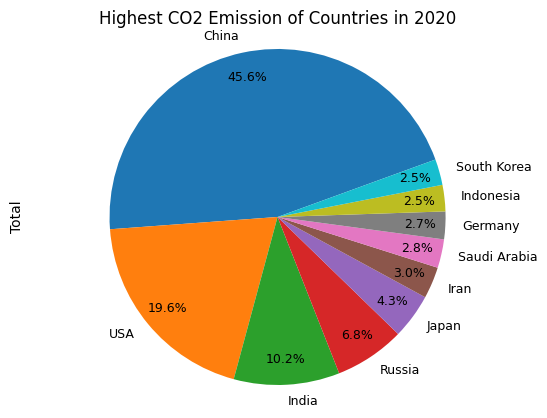

In [32]:
plt.pie(combined_sum["Total"], labels=combined_sum["Country"], autopct='%1.1f%%')
plt.title('Pie Chart with Top 10 and "Other"')
plt.axis('equal')
plt.show()


print(top_present_pollution)

top_present_pollution.set_index("Country")["Total"].plot.pie(autopct='%1.1f%%', pctdistance=0.85, startangle=20, textprops={"fontsize": 9})
plt.title('Highest CO2 Emission of Countries in 2020')
plt.axis('equal')
plt.show()